**I recommend to view the file at https://nbviewer.org/github/javisrv/Udemy_courses/blob/main/Udemy.ipynb**

- The following text reports the results of the analysis of the Udemy data set

- Udemy is a massive open online course (MOOC) platform that offers free and paid courses. Anyone can create a course, this business model allows Udemy to own hundreds of thousands of courses.

# 1. Importing basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import empiricaldist
import datetime as dt
from sklearn.preprocessing import StandardScaler

In [2]:
url = "https://raw.githubusercontent.com/al34n1x/DataScience/master/3.Pandas/udemy_courses_ejercicio.csv"

In [3]:
df = pd.read_csv(url, sep = ";", comment = "#", parse_dates = ["published_timestamp"])

Although the `comment = #` function can have NaNs, it can be used as an exercise to do some work on them.

Observation of the first 5 rows of the dataset:

In [4]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200.0,2147.0,23.0,51.0,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75.0,2792.0,923.0,274.0,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45.0,2174.0,74.0,51.0,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95.0,2451.0,11.0,36.0,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200.0,1276.0,45.0,26.0,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance


Replacing the original dataset column names with more descriptive names:

In [5]:
df.columns = ["course_id", "title", "url", "paid", "cost",
       "subscribers", "reviews", "lectures", "level",
       "duration", "date", "category"]

Analysis of the data type of each column:

In [6]:
df.dtypes

course_id                    int64
title                       object
url                         object
paid                        object
cost                       float64
subscribers                float64
reviews                    float64
lectures                   float64
level                       object
duration                   float64
date           datetime64[ns, UTC]
category                    object
dtype: object

In [7]:
print("The dataframe has: ", df.shape[0], "rows.")
print("The dataframe has: ", df.shape[1], "columns.")

The dataframe has:  3678 rows.
The dataframe has:  12 columns.


# 2. Identifying duplicate values

In [8]:
df[df.duplicated(keep = False)].sort_values(by = "course_id")

,course_id,title,url,paid,cost,subscribers,reviews,lectures,level,duration,date,category
2478,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75.0,43285.0,525.0,24.0,All Levels,4.000000,2013-01-03 00:55:31+00:00,Web Development
2561,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75.0,43285.0,525.0,24.0,All Levels,4.000000,2013-01-03 00:55:31+00:00,Web Development
1234,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20.0,0.0,0.0,9.0,Beginner Level,0.616667,2014-04-15 21:48:55+00:00,Graphic Design
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20.0,0.0,0.0,9.0,Beginner Level,0.616667,2014-04-15 21:48:55+00:00,Graphic Design
453,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20.0,0.0,0.0,20.0,All Levels,0.616667,2016-05-16 18:28:30+00:00,Business Finance
787,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20.0,0.0,0.0,20.0,All Levels,0.616667,2016-05-16 18:28:30+00:00,Business Finance
778,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25.0,0.0,0.0,10.0,All Levels,1.000000,2016-12-15 14:56:17+00:00,Business Finance
894,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25.0,0.0,0.0,10.0,All Levels,1.000000,2016-12-15 14:56:17+00:00,Business Finance
463,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40.0,0.0,0.0,35.0,All Levels,5.500000,2017-07-02 14:29:35+00:00,Business Finance
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40.0,0.0,0.0,35.0,All Levels,5.500000,2017-07-02 14:29:35+00:00,Business Finance


Being exact duplicates, they are eliminated and it is checked that said elimination has been carried out:

In [9]:
df = df.drop_duplicates()

In [10]:
df[df.duplicated(keep = False)]

,course_id,title,url,paid,cost,subscribers,reviews,lectures,level,duration,date,category


# 3. Identification and imputation of NaNs

In [11]:
df.isna().sum()

course_id       0
title           7
url            33
paid           33
cost           46
subscribers    33
reviews        33
lectures       33
level          64
duration       33
date           33
category       33
dtype: int64

## a.  Analysis of amount of NaNs: column "url"

In [12]:
mask_nula = df["url"].isna()
df[mask_nula]

,course_id,title,url,paid,cost,subscribers,reviews,lectures,level,duration,date,category
656,600316,High-Frequency Trading,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
758,631276,High-Frequency Trading,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1272,787204,Most Wanted Flat Design Techniques,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1395,787340,Most Wanted Flat Design Techniques,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1448,787096,Most Wanted Flat Design Techniques,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1805,631416,Learn Fun Dreamy Piano Techniques,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1810,661814,Piano Runs & Fills,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1842,413182,Play By Ear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1849,648628,Learn Fun Dreamy Piano Techniques,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1869,356060,Learn Piano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN


In the case of the `url` column, we proceed to eliminate all the rows since we do not have data:

In [13]:
df = df.dropna(subset = "url")
df.isna().sum()

course_id       0
title           0
url             0
paid            0
cost           13
subscribers     0
reviews         0
lectures        0
level          31
duration        0
date            0
category        0
dtype: int64

## b.  Analysis of amount of NaNs: column "level"

As there are still 31 nulls left, we try to impute them so as not to lose more data:

In [14]:
df["level"].value_counts(normalize = True).round(2)

All Levels            0.52
Beginner Level        0.35
Intermediate Level    0.11
Expert Level          0.02
Name: level, dtype: float64

Observing that the mode is "All Levels", the NaNs are replaced by "All Levels":

In [15]:
df["level"] = df["level"].fillna("All Levels")
df.isna().sum()

course_id       0
title           0
url             0
paid            0
cost           13
subscribers     0
reviews         0
lectures        0
level           0
duration        0
date            0
category        0
dtype: int64

## c. Analysis of amount of NaNs: column "cost"

In [16]:
df.loc[df["cost"].isnull(), ["title", "category", "level", "paid", "cost"]]

,title,category,level,paid,cost
95,Options Trading 101: The Basics,Business Finance,Beginner Level,False,NaN
108,Website Investing 101 - Buying & Selling Onlin...,Business Finance,All Levels,False,NaN
119,Introduction to Financial Modeling,Business Finance,Intermediate Level,False,NaN
128,Corporate Finance - A Brief Introduction,Business Finance,Beginner Level,False,NaN
143,Accounting in 60 Minutes - A Brief Introduction,Business Finance,Beginner Level,False,NaN
179,Introduction to Cryptocurrencies and Blockchain,Business Finance,Beginner Level,False,NaN
209,Apply finance concepts for smart project manag...,Business Finance,Beginner Level,False,NaN
253,IAS 18 - Revenue,Business Finance,All Levels,False,NaN
283,สอนเทรดไบนารี่ อ๊อฟชั่นอย่างง่าย,Business Finance,All Levels,False,NaN
291,"Multiply your returns using 'Value Investing"",...",Business Finance,All Levels,False,NaN


Note that all courses with `cost = NaN` correspond to free courses, since `paid level == False`.
It is decided to replace the Nan by 0:

In [17]:
df["cost"] = df["cost"].fillna(0)
df.isna().sum()

course_id      0
title          0
url            0
paid           0
cost           0
subscribers    0
reviews        0
lectures       0
level          0
duration       0
date           0
category       0
dtype: int64

# 4. Creating variables "gain" and "year"

In [18]:
df["year"] = df["date"].dt.year.astype("int")

In [19]:
df["gain"] = df["cost"] * df["subscribers"]

# 5. Descriptive analysis

## A. General analysis

In [20]:
df.describe().drop(["course_id", "lectures"], axis = 1).applymap(lambda x: f"{x:0.2f}")

,cost,subscribers,reviews,duration,year,gain
count,3639.00,3639.00,3639.00,3639.00,3639.00,3639.00
mean,66.16,3205.13,157.51,4.11,2015.43,241472.91
std,61.26,9528.83,940.32,6.07,1.19,1005356.00
min,0.00,0.00,0.00,0.00,2011.00,0.00
25%,20.00,108.50,4.50,1.00,2015.00,1560.00
50%,45.00,903.00,18.00,2.00,2016.00,22590.00
75%,95.00,2561.50,68.00,4.50,2016.00,119005.00
max,200.00,268923.00,27445.00,78.50,2017.00,24316800.00


- It is observed that the average cost of the courses is 66.16 USD and the median is 45 USD.
- The average duration of the courses is 4 hours.
- Most of the courses belong to the year 2016.
- There are a total of 268,923 subscribers

It is noteworthy that the minimum number of subscribers is 0.

In [21]:
mask_subscribers_zero = df["subscribers"] == 0
subscribers_zero = df[mask_subscribers_zero]
print("Total number of courses without subscribers: ", len(subscribers_zero))
subscribers_zero.head()

Total number of courses without subscribers:  65


,course_id,title,url,paid,cost,subscribers,reviews,lectures,level,duration,date,category,year,gain
453,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20.0,0.0,0.0,20.0,All Levels,0.616667,2016-05-16 18:28:30+00:00,Business Finance,2016,0.0
454,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20.0,0.0,0.0,27.0,Beginner Level,1.500000,2017-04-23 16:19:01+00:00,Business Finance,2017,0.0
455,1282064,Cryptocurrency (BTC & ETH) Investment & Tradin...,https://www.udemy.com/cryptocurrency-btc-eth-i...,True,20.0,0.0,0.0,7.0,Beginner Level,2.500000,2017-07-06 21:46:30+00:00,Business Finance,2017,0.0
456,1247992,Introduction to Project Management for Finance...,https://www.udemy.com/introduction-to-project-...,True,50.0,0.0,0.0,9.0,Beginner Level,2.000000,2017-07-03 21:40:32+00:00,Business Finance,2017,0.0
457,1251582,Best Practices in Corporate Budgeting,https://www.udemy.com/best-practices-corporate...,True,50.0,0.0,0.0,9.0,Intermediate Level,2.000000,2017-06-29 22:01:56+00:00,Business Finance,2017,0.0


It is possible to analyze which is the category and the level that predominates when `subscribers = 0`:

In [22]:
subscribers_zero_cat = subscribers_zero["category"].value_counts(normalize = True).sort_values().round(2) * 100
subscribers_zero_cat

Musical Instruments    17.0
Graphic Design         28.0
Business Finance       55.0
Name: category, dtype: float64

It is observed that no course in the `category = Web Development` has 0 subscribers and that more than 50% of the courses with `subscribers = 0` belong to the `category = Business Finance`.

The graph of the observation made is made:

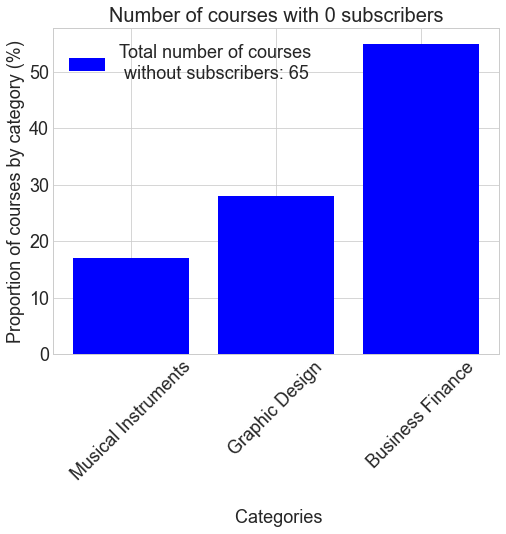

In [23]:
plt.style.use("seaborn-whitegrid")
fig, ax = plt.subplots(figsize = (8, 6))

ax.bar(subscribers_zero_cat.index, subscribers_zero_cat, color = "blue")

plt.xlabel("\n Categories", fontsize = 18)
plt.ylabel("Proportion of courses by category (%)", fontsize = 18)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18, rotation = 45)
plt.title("Number of courses with 0 subscribers", fontsize = 20)

plt.legend(["Total number of courses \n without subscribers: 65"], fontsize = 18, loc = 2)

plt.show()

To perform the same analysis on variables with `type = "object"` you have to change the data type, from `object` to `category`.

In [24]:
df[["category", "paid", "level"]] = df[["category", "paid", "level"]].astype("category")

With the `unique` row you can see the number of categories per column.

With the `top` row you can see the category that is repeated the most.

With the `freq` row you can see the number of occurrences of that category.

In [25]:
df["year"].value_counts(normalize = True)

2016    0.328662
2015    0.275350
2017    0.193460
2014    0.133553
2013    0.055235
2012    0.012366
2011    0.001374
Name: year, dtype: float64

In [26]:
categoricals = df[["category", "paid", "level"]].describe()
categoricals.index = ["No. of observations", "Unique values", "Most repeated value", "Frequency"]
categoricals.columns = ["Course Category", "Is it payment?", "Course Level"]
categoricals

,Course Category,Is it payment?,Course Level
No. of observations,3639,3639,3639
Unique values,4,2,4
Most repeated value,Web Development,True,All Levels
Frequency,1190,3330,1906


- The most predominant category is `Web Development`.
- Most courses are paid.
- The most predominant level is `All Levels`.

- A pivot table is created with MultiIndex `year`, `category`.
- The number of courses in total ["course_id"].count() is analyzed.
- The maximums for each category are highlighted in blue.

A comparison is made between the number of subscribers to paid courses and free courses `(Paid = False)`.

In [27]:
subscribers_paid = df.groupby("paid")["subscribers"].sum()
subscribers_paid = (subscribers_paid / df["subscribers"].sum()) * 100
print("Proportion of paid courses: {:.2f}%".format(subscribers_paid[True]))

Proportion of paid courses: 69.38%


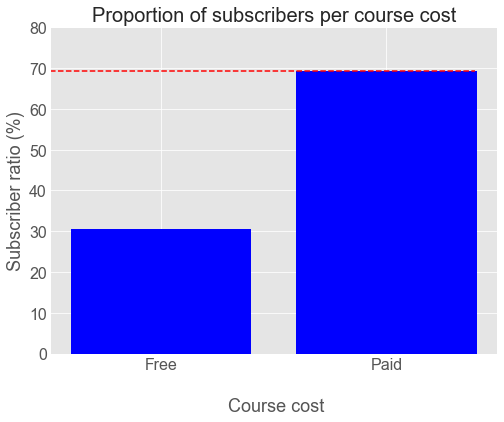

In [28]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize = (8, 6))

ax.bar(["Free", "Paid"], [30.61, 69.38], color = "blue")

plt.ylim((0, 80))
plt.axhline(69.38, color = "red", linestyle = "--", xmax = 0.95)

plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.xlabel("\n Course cost", fontsize = 18)
plt.ylabel("Subscriber ratio (%)", fontsize = 18)
plt.title("Proportion of subscribers per course cost", fontsize = 20)

plt.show()

Analysis of the distribution between the number of subscribers and the cost of the course.

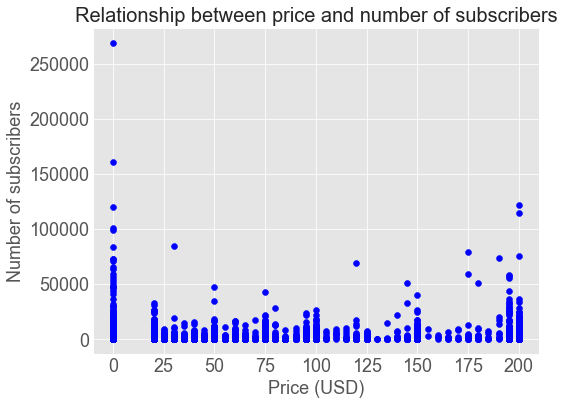

In [29]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize = (8, 6))

ax.scatter("cost", "subscribers", data = df, color = "blue")

plt.xlabel("Price (USD)", fontsize = 18)
plt.ylabel("Number of subscribers", fontsize = 18)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.title("Relationship between price and number of subscribers", fontsize = 20)

plt.show()

- It is observed that most of the courses belong to the free cost.
- A course is observed that has more than 250 thousand subscribers.

In [30]:
mask = df["subscribers"] > 200000
df[mask].loc[2827][["title", "cost", "category", "level", "subscribers", "duration"]]

title          Learn HTML5 Programming From Scratch
cost                                            0.0
category                            Web Development
level                                    All Levels
subscribers                                268923.0
duration                                       10.5
Name: 2827, dtype: object

Analysis of the duration of the course and its cost:

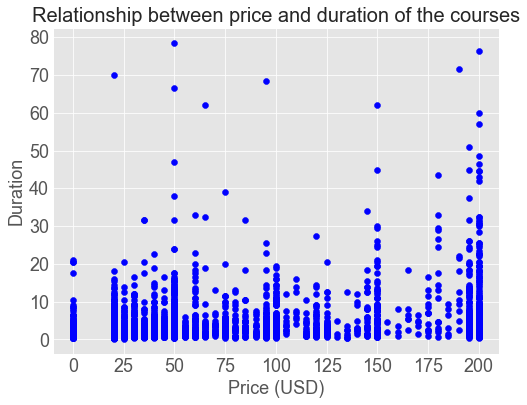

In [31]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize = (8, 6))

ax.scatter("cost", "duration", data = df, color = "blue")

plt.xlabel("Price (USD)", fontsize = 18)
plt.ylabel("Duration", fontsize = 18)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.title("Relationship between price and duration of the courses", fontsize = 20)

plt.show()

The duration of the courses grows for those who are paid.

Analysis between number of reviews and subscribers:

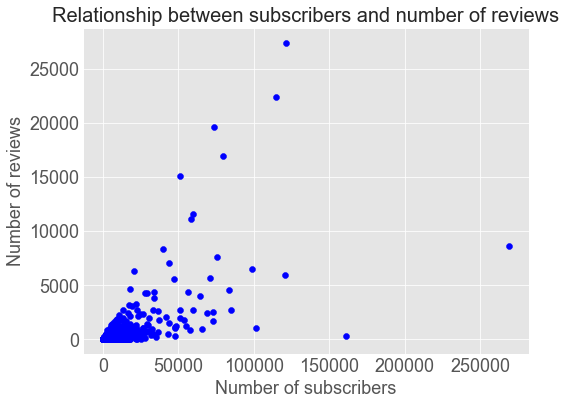

In [32]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize = (8, 6))

ax.scatter("subscribers", "reviews", data = df, color = "blue")

plt.xlabel("Number of subscribers", fontsize = 18)
plt.ylabel("Number of reviews", fontsize = 18)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.title("Relationship between subscribers and number of reviews", fontsize = 20)

plt.show()

A linear relationship is observed between the variables mentioned above.

In [35]:
subscribers_time = df.pivot_table(values = "subscribers", index = "year")
subscribers_time = subscribers_time.fillna(0)
subscribers_time.style.highlight_max(color = "blue", axis = 0)

,subscribers
year,
2011,23805.600000
2012,12340.866667
2013,8358.970149
2014,3939.893004
2015,3454.888224
2016,2470.224080
2017,1389.160511


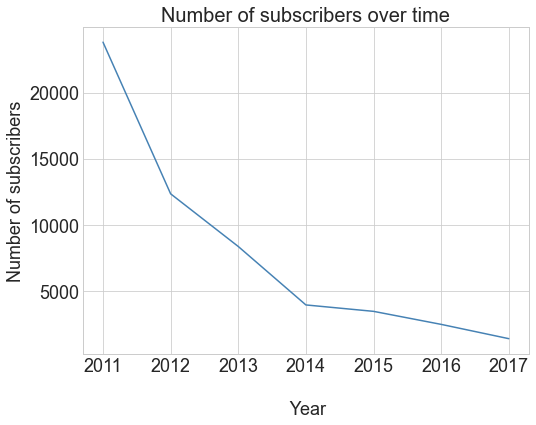

In [37]:
plt.style.use("seaborn-whitegrid")

subscribers_time.plot(color = "steelblue", figsize = (8, 6))

plt.xlabel("\n Year", fontsize = 18)
plt.ylabel("Number of subscribers", fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title("Number of subscribers over time", fontsize = 20)
plt.legend([])

plt.show()

The number of udemy subscribers drops as the years go by

## B. Category analysis

The proportion of subscribers for each category is calculated:

In [40]:
subscrib_category = (df.groupby("category")["subscribers"].count() / len(df)) * 100
subscrib_category = subscrib_category.sort_values().round(2)
subscrib_category

category
Graphic Design         16.46
Musical Instruments    18.16
Business Finance       32.67
Web Development        32.70
Name: subscribers, dtype: float64

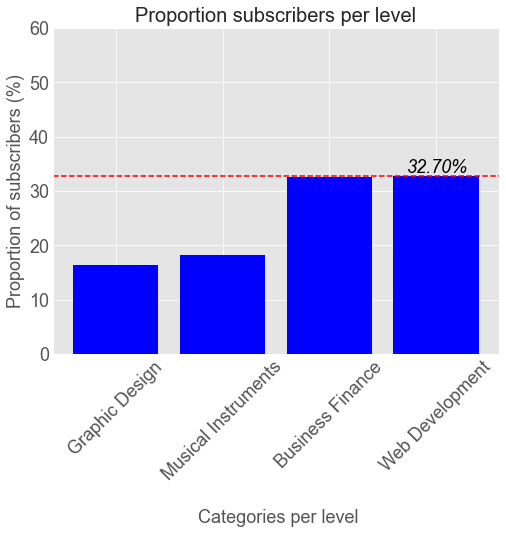

In [41]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize = (8, 6))

ax.bar(subscrib_category.index, subscrib_category, color = "blue")

plt.ylim((0, 60))
plt.axhline(32.70, color = "red", linestyle = "--")
style = dict(size = 18, color = 'black', fontstyle = "oblique")
ax.text("Web Development", 32.70, "32.70%", ha = "center", va = "bottom", **style)

plt.xlabel("\n Categories per level", fontsize = 18)
plt.ylabel("Proportion of subscribers (%)", fontsize = 18)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18, rotation = 45)
plt.title("Proportion subscribers per level", fontsize = 20)

plt.show()

In this case, `category = Business Finance` and `category = Web Development` represent 65% of the sample.

Within each category, the proportion of subscribers of free courses `cost = 0` and with the maximum cost `cost = 200` is compared.

In [42]:
subscrib_category_0 = df.loc[df["cost"] == 0, ["category", "subscribers"]]
subscrib_category_0 = (subscrib_category_0.groupby("category")["subscribers"].count() / len(subscrib_category_0)) *100
subscrib_category_0 = subscrib_category_0.sort_values().round(2)
subscrib_category_0

category
Graphic Design         11.00
Musical Instruments    14.89
Business Finance       31.07
Web Development        43.04
Name: subscribers, dtype: float64

In [43]:
subscrib_category_200 = df.loc[df["cost"] == 200, ["category", "subscribers"]]
subscrib_category_200 = (subscrib_category_200.groupby("category")["subscribers"].count() / len(subscrib_category_200)) *100
subscrib_category_200 = subscrib_category_200.sort_values().round(2)
subscrib_category_200

category
Musical Instruments     6.44
Graphic Design         11.86
Web Development        38.31
Business Finance       43.39
Name: subscribers, dtype: float64

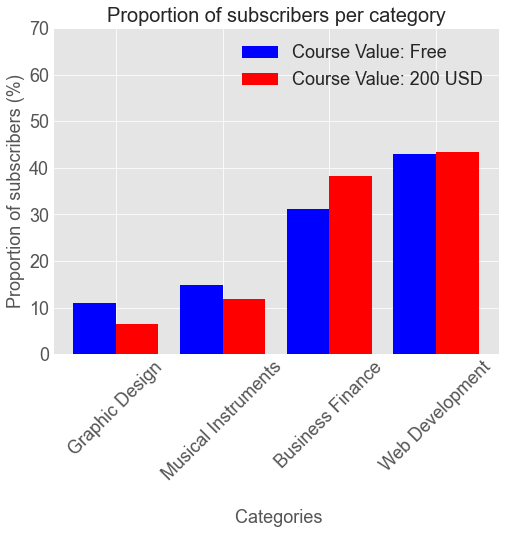

In [44]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize = (8, 6))

labels = ["Graphic Design", "Musical Instruments", "Business Finance", "Web Development"]

x = np.arange(len(labels)) 
width = 0.4

ax.bar(x - width/2, subscrib_category_0, color = "blue", width = 0.4, label = "Course Value: Free")
ax.bar(x + width/2, subscrib_category_200, color = "red", width = 0.4, label = "Course Value: 200 USD")

plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18, rotation = 45)
plt.ylim((0, 70))
plt.xticks(x, labels)

plt.xlabel("\n Categories", fontsize = 18)
plt.ylabel("Proportion of subscribers (%)", fontsize = 18)
plt.title("Proportion of subscribers per category", fontsize = 20)
plt.legend(fontsize = 18)

plt.show()

- No free courses are observed for `categoria = Graphic Design`.

- For `Web Development` there is a higher proportion of subscribers who paid the maximum value.

- For `Graphic Design`, the trend just mentioned is reversed.

In [45]:
subscribers_time_category = df.pivot_table(values = "subscribers", index = "year", columns = "category")
subscribers_time_category = subscribers_time_category.fillna(0)
subscribers_time_category.style.highlight_max(color = "blue", axis = 0)

category,Business Finance,Graphic Design,Musical Instruments,Web Development
year,,,,
2011,0.000000,0.000000,0.000000,23805.600000
2012,603.333333,10064.900000,13363.500000,16707.105263
2013,3710.285714,2179.695652,3851.897436,21238.763636
2014,2576.161458,2685.876923,1285.840336,9932.436364
2015,1477.459941,2100.333333,1109.951220,7294.312312
2016,1229.530259,1254.207865,639.495536,4835.000000
2017,584.300448,1002.200000,567.200000,2863.226244


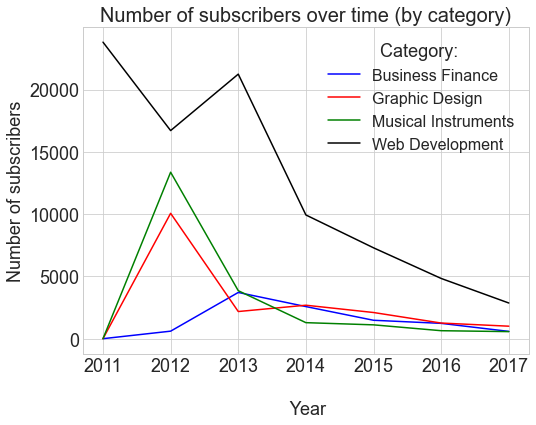

In [46]:
plt.style.use("seaborn-whitegrid")

subscribers_time_category.plot(color = ["blue", "red", "green", "black"], figsize = (8, 6))

plt.xlabel("\n Year", fontsize = 18)
plt.ylabel("Number of subscribers", fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title("Number of subscribers over time (by category)", fontsize = 20)
plt.legend(title = "Category: ", fontsize = 16, title_fontsize = 18)

plt.show()

- All courses for different `category` show a drop in the number of subscribers.
- It is observed that for the `categories = Business Finance`, `categories = Graphic Design`, `categories = Musical Instruments` there are no subscribers for the year 2011.
- The most marked declines for the categories `Musical Instruments` and `Graphic Design` occur from the year 2012 - 2013.
- For the `category = Web Development` from the year 2013 - 2017.

In [47]:
courses_category_time = df.pivot_table(values = "course_id", index = "year", columns = "category", aggfunc = 'count')
courses_category_time = courses_category_time.fillna(0)
courses_category_time.style.highlight_max(color = 'blue', axis = 0)

category,Business Finance,Graphic Design,Musical Instruments,Web Development
year,,,,
2011,0,0,0,5
2012,6,10,10,19
2013,84,23,39,55
2014,192,65,119,110
2015,337,168,164,333
2016,347,178,224,447
2017,223,155,105,221


The year 2016 has the largest number of courses for each category

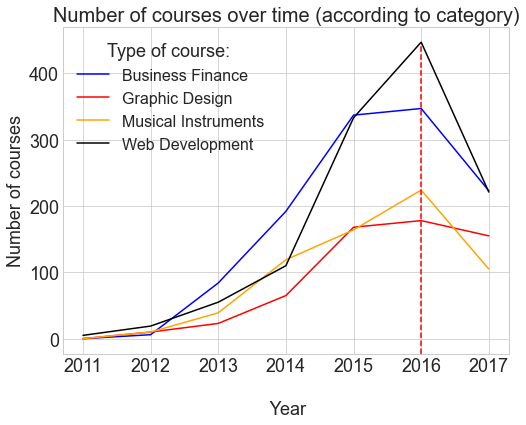

In [48]:
plt.style.use("seaborn-whitegrid")

courses_category_time.plot(color = ["blue", "red", "orange", "black"], figsize = (8, 6))

plt.axvline(2016, color = "red", linestyle = "--", ymax = 0.95) 
plt.xlabel("\n Year", fontsize = 18)
plt.ylabel("Number of courses", fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title("Number of courses over time (according to category)", fontsize = 20)
plt.legend(title = "Type of course: ", fontsize = 16, title_fontsize = 18)

plt.show()

- The graph shows an increase in the number of courses in `category = "Business Finance` as of 2012, flattening as of 2015.

- The graph shows a substantial increase in the number of courses in `category = "Web Development` between 2014 and 2015.

- For all categories, the number of courses decreases from 2016, a possible explanation could be the lack of data registration for such dates.

- A groupby with MultiIndex `year, category` is created.
- The average cost of each course is analyzed.
- The maximum for each category is highlighted in blue.

In [49]:
price_category = df.pivot_table(values = "cost", index = "year", columns = "category")
price_category = price_category.fillna(0)
price_category.style.highlight_max(color = 'blue', axis = 1)

category,Business Finance,Graphic Design,Musical Instruments,Web Development
year,,,,
2011,0.000000,0.000000,0.000000,62.000000
2012,42.500000,35.000000,41.500000,42.894737
2013,45.535714,38.043478,41.666667,81.090909
2014,53.151042,35.769231,46.302521,50.636364
2015,68.249258,62.529762,49.359756,76.591592
2016,73.213256,58.904494,51.160714,81.208054
2017,85.313901,65.290323,50.476190,86.040724


It can be seen that the `Business Finance and Web Development` categories have a higher average cost than `Graphic Design and Musical Instruments`.

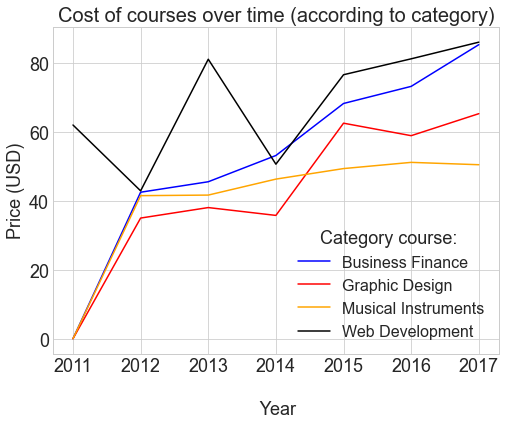

In [51]:
plt.style.use("seaborn-whitegrid")

price_category.plot(color = ["blue", "red", "orange", "black"], figsize = (8, 6))

plt.xlabel("\n Year", fontsize = 18)
plt.ylabel("Price (USD)", fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title("Cost of courses over time (according to category)", fontsize = 20)
plt.legend(title = "Category course: ", fontsize = 16, title_fontsize = 18)

plt.show()

- It is observed that for the year 2011 the categories `Business Finance`, `Graphic Design` and `Musical Instruments` did not yet exist.

- `category = Web Development` and `category = Business Finance` present a higher average price in their courses

## C. Level analysis

Cost analysis in terms of mean and median for each of the levels:

In [112]:
all_levels = df.loc[df["level"] == "All Levels", "cost"]
beginner_levels = df.loc[df["level"] == "Beginner Level", "cost"]
intermediate_levels = df.loc[df["level"] == "Intermediate Level", "cost"]
expert_levels = df.loc[df["level"] == "Expert Level", "cost"]

In [113]:
df_plot_levels = [all_levels,beginner_levels,intermediate_levels,expert_levels]

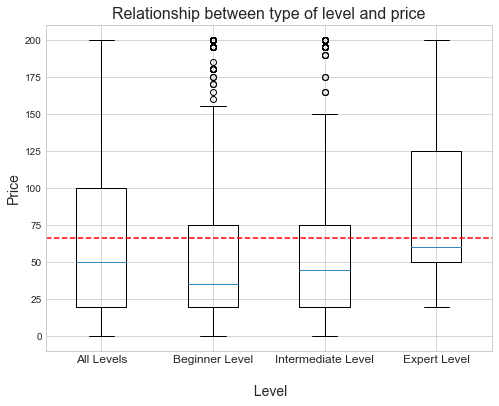

In [114]:
plt.style.use("seaborn-whitegrid")
fig, ax = plt.subplots(figsize = (8, 6))

level_labels = ["All Levels", "Beginner Level", "Intermediate Level", "Expert Level"]
ax.boxplot(df_plot_levels, labels = level_labels)

plt.xlabel("\n Level", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.xticks(fontsize = 12)
plt.title("Relationship between type of level and price", fontsize = 16)
plt.axhline(df["cost"].mean(), color = "red", linestyle = "--") 

plt.show()

- Beyond the outliers, it is observed that the cost for `level = Expert Level` is higher, although there do not seem to be significant differences.

The proportion of subscribers for each level is calculated:

In [82]:
subscrib_level = (df.groupby("level")["subscribers"].count() / len(df)) * 100
subscrib_level = subscrib_level.sort_values().round(2)
subscrib_level

level
Expert Level           1.59
Intermediate Level    11.24
Beginner Level        34.79
All Levels            52.38
Name: subscribers, dtype: float64

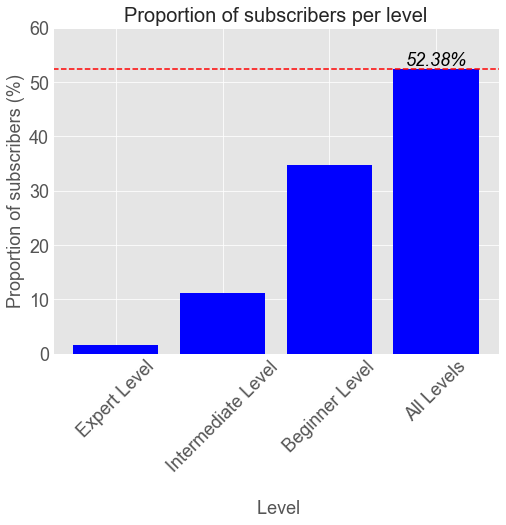

In [84]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize = (8, 6))

ax.bar(subscrib_level.index, subscrib_level, color = "blue")

plt.ylim((0, 60))
plt.axhline(52.38, color = "red", linestyle = "--")
style = dict(size =18, color = 'black', fontstyle = "oblique")
ax.text('All Levels', 52.38, "52.38%", ha = "center", va = "bottom", **style)

plt.xlabel("\n Level", fontsize = 18)
plt.ylabel("Proportion of subscribers (%)", fontsize = 18)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18, rotation = 45)
plt.title("Proportion of subscribers per level", fontsize = 20)

plt.show()

The levels `All Levels, Beginner Level` represent almost 90% of the sample.

The analysis is deepened, looking for the proportion of subscribers by `level`, according to no `cost = 0` (minimum price that a course can have) or `cost = 200` (maximum price that a course can have).

In [85]:
subscrib_level_0 = df.loc[df["cost"] == 0, ["level", "subscribers"]]
subscrib_level_0 = (subscrib_level_0.groupby("level")["subscribers"].count() / len(subscrib_level_0)) *100
subscrib_level_0 = subscrib_level_0.sort_values().round(2)
subscrib_level_0

level
Expert Level           0.00
Intermediate Level     9.39
All Levels            39.48
Beginner Level        51.13
Name: subscribers, dtype: float64

In [86]:
subscrib_level_200 = df.loc[df["cost"] == 200, ["level", "subscribers"]]
subscrib_level_200 = (subscrib_level_200.groupby("level")["subscribers"].count() / len(subscrib_level_200)) *100
subscrib_level_200 = subscrib_level_200.sort_values().round(2)
subscrib_level_200

level
Expert Level           3.39
Intermediate Level     7.12
Beginner Level        27.12
All Levels            62.37
Name: subscribers, dtype: float64

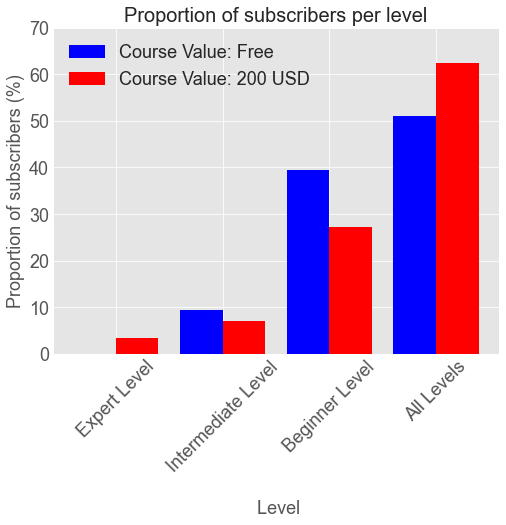

In [88]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize = (8, 6))

labels = ["Expert Level", "Intermediate Level", "Beginner Level", "All Levels"]

x = np.arange(len(labels)) 
width = 0.4

ax.bar(x - width/2, subscrib_level_0, color = "blue", width = 0.4, label = "Course Value: Free")
ax.bar(x + width/2, subscrib_level_200, color = "red", width = 0.4, label = "Course Value: 200 USD")

plt.xticks(fontsize = 18, rotation = 45)
plt.yticks(fontsize = 18)
plt.ylim((0, 70))
plt.xticks(x, labels)

plt.xlabel("\n Level", fontsize = 18)
plt.ylabel("Proportion of subscribers (%)", fontsize = 18)
plt.title("Proportion of subscribers per level", fontsize = 20)
plt.legend(fontsize = 18)

plt.show()

- For `Expert Level` no free courses are observed.

- For `All Levels` there is a higher proportion of subscribers who paid the maximum value.

- For `Beginner Level`, the trend just mentioned is reversed.

In [108]:
subscribers_time_level = df.pivot_table(values = "subscribers", index = "year", columns = "level")
subscribers_time_level = subscribers_time_level.fillna(0)
subscribers_time_level.style.highlight_max(color = 'blue', axis = 0)

level,All Levels,Beginner Level,Expert Level,Intermediate Level
year,,,,
2011,23805.600000,0.000000,0.000000,0.000000
2012,11797.151515,18124.222222,0.000000,971.666667
2013,8107.633663,11264.616438,773.222222,1778.111111
2014,4092.003717,4287.811688,1265.000000,2519.593220
2015,4106.469671,2770.147590,1380.200000,1948.371795
2016,2631.340323,2526.674074,1099.545455,1797.243750
2017,1369.803987,1572.081911,283.105263,1095.153846


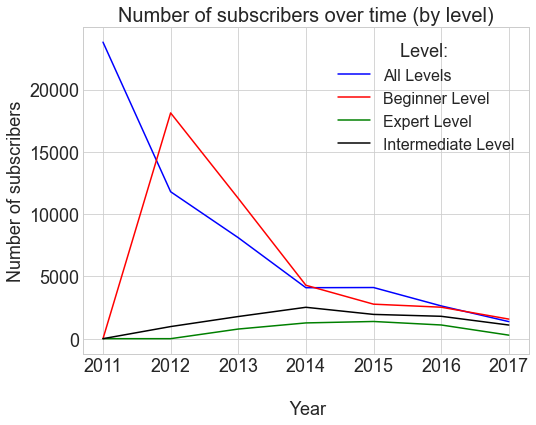

In [111]:
plt.style.use("seaborn-whitegrid")

subscribers_time_level.plot(color = ["blue", "red", "green", "black"], figsize = (8, 6))

plt.xlabel("\n Year", fontsize = 18)
plt.ylabel("Number of subscribers", fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title("Number of subscribers over time (by level)", fontsize = 20)
plt.legend(title = "Level: ", fontsize = 16, title_fontsize = 18)

plt.show()

- All courses for different `category` show a drop in the number of subscribers.
- It is observed that for the `categories = Business Finance`, `categories = Graphic Design`, `categories = Musical Instruments` there are no subscribers for the year 2011.
- The most marked declines for the categories `Musical Instruments` and `Graphic Design` occur from the year 2012 - 2013.
- For the `category = Web Development` from the year 2013 - 2017.

- A pivot table with MultiIndex `anio`, `nivel` is created.
- The number of courses in total `["id_curso"].count()` is analyzed.
- The maximum for each level is recorded in blue.

In [92]:
course_level_time = df.pivot_table(values = "course_id", index = "year", columns = "level", aggfunc = "count")
course_level_time = course_level_time.fillna(0)
course_level_time.style.highlight_max(color = 'blue', axis = 0)

level,All Levels,Beginner Level,Expert Level,Intermediate Level
year,,,,
2011,5,0,0,0
2012,33,9,0,3
2013,101,73,9,18
2014,269,154,4,59
2015,577,332,15,78
2016,620,405,11,160
2017,301,293,19,91


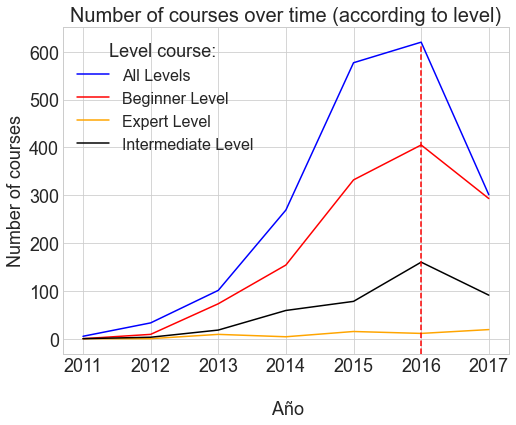

In [93]:
plt.style.use("seaborn-whitegrid")

course_level_time.plot(color = ["blue", "red", "orange", "black"], figsize = (8, 6))

plt.axvline(2016, color = "red", linestyle = "--", ymax = 0.95) 
plt.xlabel("\n Año", fontsize = 18)
plt.ylabel("Number of courses", fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title("Number of courses over time (according to level)", fontsize = 20)
plt.legend(title = "Level course: ", fontsize = 16, title_fontsize = 18)

plt.show()

- The graph shows a greater growth of the `All Levels` and `Beginner Level` levels.

- Again for 3 of 4 levels, the number of courses decreases from 2016.

- A groupby with MultiIndex `year, level` is created.
- The average cost of each level is analyzed.
- The maximum for each level is highlighted in blue.

In [97]:
price_level = df.pivot_table(values = "cost", index = "year", columns = "level")
price_level = price_level.fillna(0)
price_level.style.highlight_max(color = 'blue', axis = 0)

level,All Levels,Beginner Level,Expert Level,Intermediate Level
year,,,,
2011,62.000000,0.000000,0.000000,0.000000
2012,34.242424,67.777778,0.000000,31.666667
2013,53.316832,55.410959,64.444444,43.055556
2014,57.565056,33.668831,41.250000,47.033898
2015,75.303293,52.304217,86.000000,64.102564
2016,76.927419,59.938272,98.636364,66.218750
2017,86.644518,65.119454,113.947368,67.417582


As expected, the `Expert Level` courses are the most expensive. In turn, since 2012, an increase in the average cost of courses has been observed for most levels.

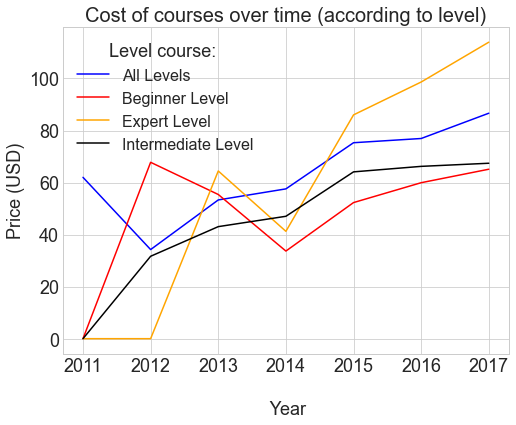

In [100]:
plt.style.use("seaborn-whitegrid")

price_level.plot(color = ["blue", "red", "orange", "black"], figsize = (8, 6))

plt.xlabel("\n Year", fontsize = 18)
plt.ylabel("Price (USD)", fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title("Cost of courses over time (according to level)", fontsize = 20)
plt.legend(title = "Level course: ", fontsize = 16, title_fontsize = 18)

plt.show()

- For all categories, the average price of the courses increases

- It is observed that only `level = All Levels` begins with a value greater than 0, for the year 2011. This indicates the possibility of the lack of categorization of courses according to level.

- `level = Expert Level` presents the highest average value

## D. What were the most profitable courses?

In [115]:
df = df.sort_values(by = "gain", ascending=False)
df.head()

,course_id,title,url,paid,cost,subscribers,reviews,lectures,level,duration,date,category,year,gain
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200.0,121584.0,27445.0,342.0,All Levels,43.0,2015-11-02 21:13:27+00:00,Web Development,2015,24316800.0
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200.0,114512.0,22412.0,304.0,All Levels,30.5,2016-03-08 22:28:36+00:00,Web Development,2016,22902400.0
1979,238934,Pianoforall - Incredible New Way To Learn Pian...,https://www.udemy.com/pianoforall-incredible-n...,True,200.0,75499.0,7676.0,362.0,All Levels,30.0,2014-08-07 06:27:51+00:00,Musical Instruments,2014,15099800.0
3204,756150,Angular 4 (formerly Angular 2) - The Complete ...,https://www.udemy.com/the-complete-guide-to-an...,True,190.0,73783.0,19649.0,329.0,All Levels,22.0,2016-02-11 07:29:29+00:00,Web Development,2016,14018770.0
3247,364426,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/,True,175.0,79612.0,16976.0,85.0,All Levels,11.5,2015-03-12 23:19:54+00:00,Web Development,2015,13932100.0


In [117]:
top5 =  df[["title", "gain"]].sort_values(by = "gain", ascending = True).tail()
top5["gain"] = top5["gain"] / 1000
top5

,title,gain
3247,JavaScript: Understanding the Weird Parts,13932.10
3204,Angular 4 (formerly Angular 2) - The Complete ...,14018.77
1979,Pianoforall - Incredible New Way To Learn Pian...,15099.80
3232,The Complete Web Developer Course 2.0,22902.40
3230,The Web Developer Bootcamp,24316.80


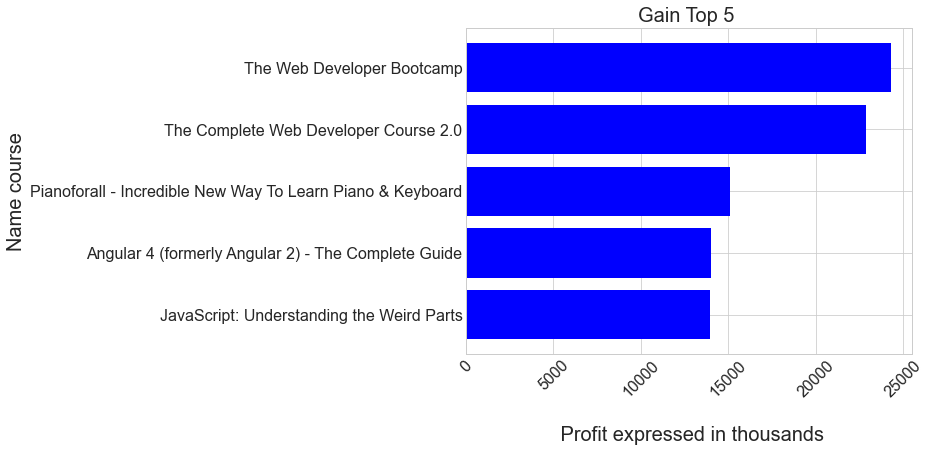

In [118]:
plt.style.use("seaborn-whitegrid")
fig, ax = plt.subplots(figsize = (8, 6))

ax.barh(top5["title"], top5["gain"], color = "blue")

plt.yticks(fontsize = 16)
plt.ylabel("Name course", fontsize = 20)
plt.xlabel("\n Profit expressed in thousands", fontsize = 20)
plt.xticks(fontsize = 16, rotation = 45)
plt.title("Gain Top 5 ", fontsize = 20)

plt.show()

The predominance of courses dedicated to Web development can be observed.

# 6. Conclusion

- General:
    - It is observed that the average cost of the courses was 66.16 USD and the median was 45 USD.
    - The average duration of the courses was 4 hours.
    - Most of the courses belong to the year 2016.
    - There were a total of 268,923 subscribers and the number of udemy subscribers fell as the years go by.
    - Most courses were paid (70%) and the duration of the courses grew for those who were paid.
    - 4 of the 5 courses that gave udemy the most profit were `category = Web Development`.
    
- Category:
    - The most predominant category was Web Development.
    - `category = Web Development` and `category = Business Finance` presented a higher average price in their courses.

- Level:
    - The most predominant level was `All Levels`.
    - The price for `level = Expert Level` was higher compared to the other levels.